In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [8]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

print(PLAID_CLIENT_ID)
print(PLAID_SECRET)
print(PLAID_PUBLIC_KEY)


5e30da88dd6924001167ec02
ac8fa6aef1d0102b6666a88418f113
13f3dd7db24349e5c9aba0963e551d


# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [9]:
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [10]:
create_token = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [11]:
exchange_response = client.Item.public_token.exchange(create_token['public_token'])
access_token = exchange_response['access_token']

access-sandbox-e7313a32-6b3e-4cf1-8115-971df60226ad


### 4. Fetch Accounts

In [12]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': '6RjzMWyKMnf8Ndv4qW1mC5DvLXPlx3TgDNGdr',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'XyvalnKklbsmypqwW93zcWPkeMzJ45FdKVyed',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'DPAM3ayQ3ntPy6R1wqA9swWQbzMD68cvWVn63',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [13]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
transactions_list = json.dumps(transaction_response['transactions'],indent=4, sort_keys=True)
print(transactions_list)

[
    {
        "account_id": "Vbvx8AkK8ZtnER9BmQZ1cmGjEoe8nRTWgxRKq",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-01-26",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
    

### 2. Print the categories for each transaction

In [14]:
transactions = transaction_response['transactions']
categories = []
for transaction in transactions:
    category = transaction['category'][0]
    categories.append(category)
    print(category)

Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel
Food and Drink
Payment
Food and Drink
Shops
Payment
Travel
Transfer
Transfer
Recreation
Travel
Food and Drink
Food and Drink
Food and Drink
Transfer
Travel
Travel


### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [23]:
transactions = transaction_response['transactions']

dates = []
names = []
amounts = []
categories = []

for transaction in transactions:
    category = transaction['category'][0]
    categories.append(category)
    dates.append(transaction['date'])
    names.append(transaction['name'])
    amounts.append(transaction['amount'])

for i in range(len(dates)):
    print(f"{dates[i]} {names[i]} \t ${amounts[i]} Cat: {categories[i]}")

df = pd.DataFrame(list(zip(dates,names,amounts,categories)), 
                columns =['Date','Seller','Amount','Category'])
df.head()

2020-01-26 Tectra Inc 	 $500 Cat: Food and Drink
2020-01-25 AUTOMATIC PAYMENT - THANK 	 $2078.5 Cat: Payment
2020-01-25 KFC 	 $500 Cat: Food and Drink
2020-01-25 Madison Bicycle Shop 	 $500 Cat: Shops
2020-01-16 CREDIT CARD 3333 PAYMENT *// 	 $25 Cat: Payment
2020-01-16 Uber 	 $5.4 Cat: Travel
2020-01-15 ACH Electronic CreditGUSTO PAY 123456 	 $5850 Cat: Transfer
2020-01-15 CD DEPOSIT .INITIAL. 	 $1000 Cat: Transfer
2020-01-14 Touchstone Climbing 	 $78.5 Cat: Recreation
2020-01-14 United Airlines 	 $-500 Cat: Travel
2020-01-13 McDonald's 	 $12 Cat: Food and Drink
2020-01-13 Starbucks 	 $4.33 Cat: Food and Drink
2020-01-12 SparkFun 	 $89.4 Cat: Food and Drink
2020-01-11 INTRST PYMNT 	 $-4.22 Cat: Transfer
2020-01-01 United Airlines 	 $500 Cat: Travel
2019-12-30 Uber 	 $6.33 Cat: Travel
2019-12-27 Tectra Inc 	 $500 Cat: Food and Drink
2019-12-26 AUTOMATIC PAYMENT - THANK 	 $2078.5 Cat: Payment
2019-12-26 KFC 	 $500 Cat: Food and Drink
2019-12-26 Madison Bicycle Shop 	 $500 Cat: Shops
201

,Date,Seller,Amount,Category
0,2020-01-26,Tectra Inc,500.0,Food and Drink
1,2020-01-25,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-01-25,KFC,500.0,Food and Drink
3,2020-01-25,Madison Bicycle Shop,500.0,Shops
4,2020-01-16,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [24]:
df['Seller'].astype('str')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [28]:
client.Accounts.get(access_token)
resp = client.Income.get(access_token)
previous_year_gross_income = resp['income']['last_year_income_before_tax']
monthly_income = resp['income']['income_streams'][0]['monthly_income']
projected_yearly_income = monthly_income * 12

print(f"Previous Year's Gross Income: ${previous_year_gross_income}")
print(f"Current Monthly Income: ${monthly_income}")
print(f"Projected Yearly Income: ${projected_yearly_income}")

Previous Year's Gross Income: $7285
Current Monthly Income: $500
Projected Yearly Income: $6000


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

                Total Spending Per Category
Category                                   
Transfer                           20537.34
Payment                             6310.50
Food and Drink                      3317.19
Shops                               1500.00
Recreation                           235.50
Travel                                35.19
                                  Seller  Amount        Category
Date                                                            
2020-01-26                    Tectra Inc   500.0  Food and Drink
2020-01-25     AUTOMATIC PAYMENT - THANK  2078.5         Payment
2020-01-25                           KFC   500.0  Food and Drink
2020-01-25          Madison Bicycle Shop   500.0           Shops
2020-01-16  CREDIT CARD 3333 PAYMENT *//    25.0         Payment


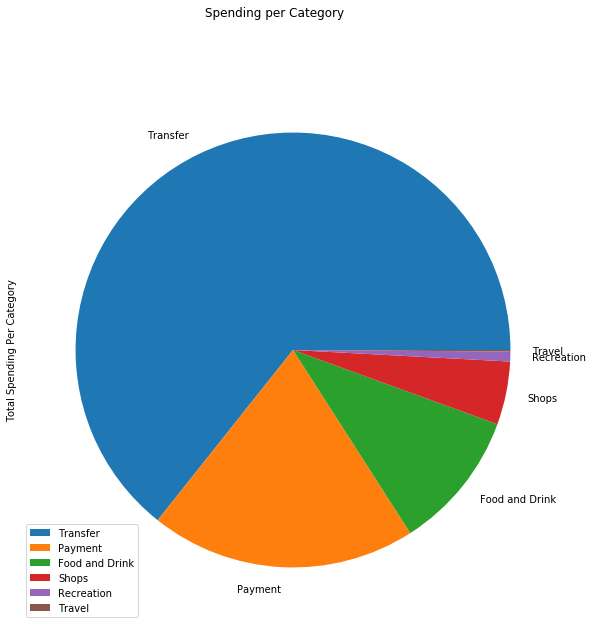

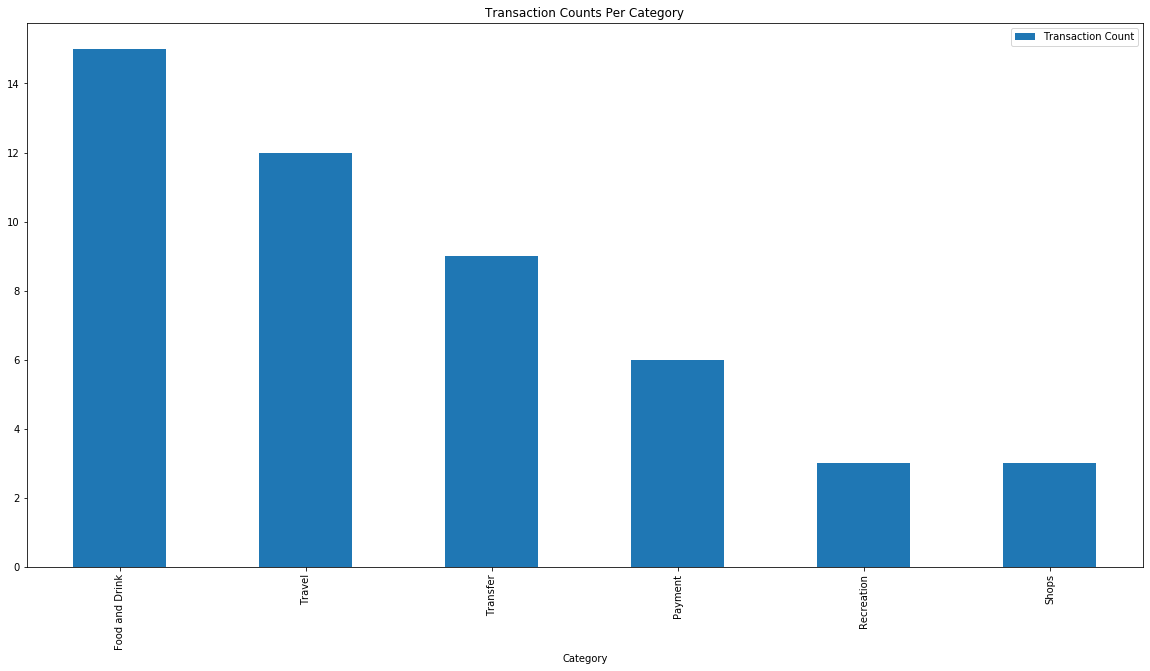

In [34]:
category_total_df = df.filter(['Category','Amount'])
per_category = category_total_df.groupby(['Category']).sum()
per_category.columns = ['Total Spending Per Category']
per_category.sort_values('Total Spending Per Category',ascending=False,inplace=True)
print(per_category)
per_category.plot.pie(subplots=True,figsize=(20,10), title="Spending per Category")

count = df.filter(['Category','Amount']).groupby(['Category']).count()
count.columns = ['Transaction Count']
count.sort_values('Transaction Count',ascending=False,inplace=True)
count.plot.bar(figsize=(20,10), title="Transaction Counts Per Category")
print(df.head())

### Calculate the expenses per month

        Amount
Date          
1     10638.91
10        6.33
11    10645.24
12    10645.24


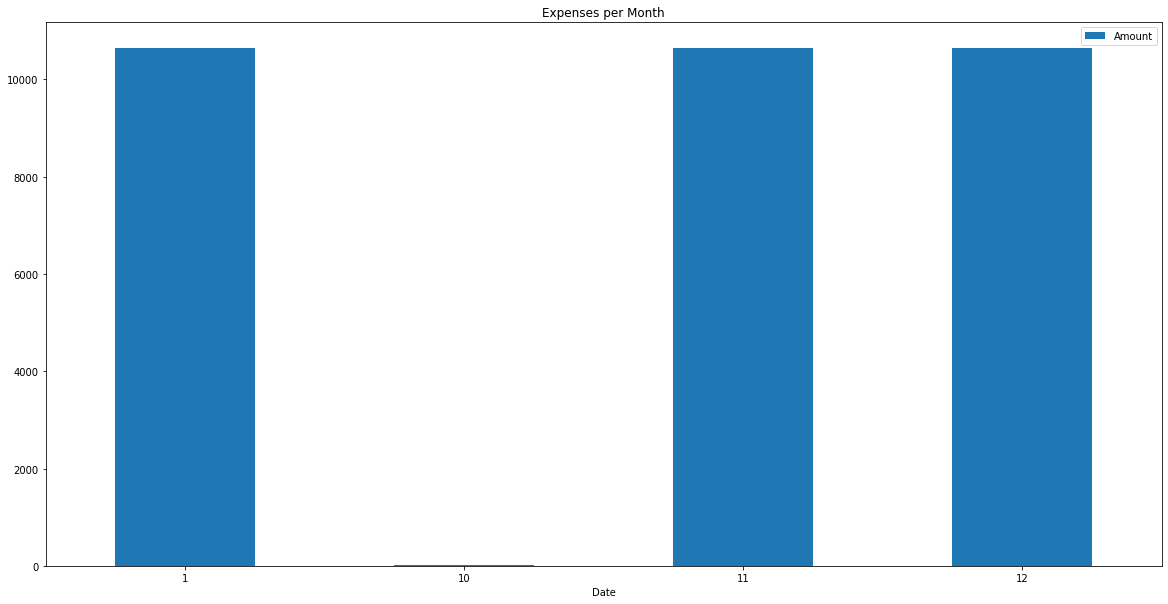

In [38]:
spending_df = df.filter(['Date','Amount'])
spending_df.index = pd.to_datetime(spending_df.index)
by_month = spending_df.groupby(spending_df.index.month).sum()
by_month.sort_index()
print(by_month)
by_month.plot(kind='bar',rot=0, title="Expenses per Month", figsize=(20,10))